In [1]:
!pip install requests beautifulsoup4 pandas matplotlib seaborn



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install selenium


  Using cached attrs-23.2.0-py3-none-any.whl.metadata (9.5 kB)
Using cached attrs-23.2.0-py3-none-any.whl (60 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from bs4 import BeautifulSoup
import requests

In [12]:
url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm#'

page=requests.get(url)

soup=BeautifulSoup(page.text,'html')

In [13]:
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=7" http-equiv="X-UA-Compatible"/>
<meta content="no-cache, no-store, must-revalidate" http-equiv="Cache-Control"/>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="0" http-equiv="Expires"/>
<meta content="300" http-equiv="refresh"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_conf

In [14]:
soup.find('table')

<table class="table">
<thead>
<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>
</thead>
<tbody>
<tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresultState-369.htm">240</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">240</td>
</tr>
<tr class="tr">
<td style="text-align:left">Indian National Congress - INC</td>
<td style="text-align:right">
<a href="partywisewinresultState-742.htm">99</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                              

In [15]:
soup.find_all('th')

[<th style="text-align: left;">Party</th>,
 <th style="text-align:right">Won</th>,
 <th style="text-align:right">Leading</th>,
 <th style="text-align:right">Total</th>,
 <th>Total</th>,
 <th style="text-align:right">543</th>,
 <th style="text-align:right">0</th>,
 <th style="text-align:right">543</th>]

In [16]:
party_title = soup.find_all('th')


In [19]:
party_table_titles=[title.text for title in party_title]
print(party_table_titles)                   

['Party', 'Won', 'Leading', 'Total', 'Total', '543', '0', '543']


In [20]:
import pandas as pd

In [23]:
df= pd.DataFrame(columns = party_table_titles)

df



,Party,Won,Leading,Total,Total,543,0,543


In [33]:
party_row=soup.find_all('tr')
print(party_row)

[<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>, <tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresultState-369.htm">240</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">240</td>
</tr>, <tr class="tr">
<td style="text-align:left">Indian National Congress - INC</td>
<td style="text-align:right">
<a href="partywisewinresultState-742.htm">99</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">99<

In [40]:
from bs4 import BeautifulSoup, Tag


In [58]:
for row in party_row[1:]:
    row_data=row.find_all('td')
    individual_row_data=[data.text.strip() for data in row_data]
    
    print(individual_row_data)
    # length = len(df)
    # df.loc[length] = individual_row_data

['Bharatiya Janata Party - BJP', '240', '0', '240']
['Indian National Congress - INC', '99', '0', '99']
['Samajwadi Party - SP', '37', '0', '37']
['All India Trinamool Congress - AITC', '29', '0', '29']
['Dravida Munnetra Kazhagam - DMK', '22', '0', '22']
['Telugu Desam - TDP', '16', '0', '16']
['Janata Dal  (United) - JD(U)', '12', '0', '12']
['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9']
['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8']
['Shiv Sena - SHS', '7', '0', '7']
['Lok Janshakti Party(Ram Vilas) - LJPRV', '5', '0', '5']
['Yuvajana Sramika Rythu Congress Party - YSRCP', '4', '0', '4']
['Rashtriya Janata Dal - RJD', '4', '0', '4']
['Communist Party of India  (Marxist) - CPI(M)', '4', '0', '4']
['Indian Union Muslim League - IUML', '3', '0', '3']
['Aam Aadmi Party - AAAP', '3', '0', '3']
['Jharkhand Mukti Morcha - JMM', '3', '0', '3']
['Janasena Party - JnP', '2', '0', '2']
['Communist Party of India  (Marxist-Leninist)  (Liberation) 

In [97]:
data = [
    ['Bharatiya Janata Party - BJP', '240', '0', '240'],
    ['Indian National Congress - INC', '99', '0', '99'],
    ['Samajwadi Party - SP', '37', '0', '37'],
    ['All India Trinamool Congress - AITC', '29', '0', '29'],
    ['Dravida Munnetra Kazhagam - DMK', '22', '0', '22'],
    ['Telugu Desam - TDP', '16', '0', '16'],
    ['Janata Dal  (United) - JD(U)', '12', '0', '12'],
    ['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9'],
    ['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8'],
    ['Shiv Sena - SHS', '7', '0', '7'],
    ['Lok Janshakti Party(Ram Vilas) - LJPRV', '5', '0', '5'],
    ['Yuvajana Sramika Rythu Congress Party - YSRCP', '4', '0', '4'],
    ['Rashtriya Janata Dal - RJD', '4', '0', '4'],
    ['Communist Party of India  (Marxist) - CPI(M)', '3', '0', '3'],
    ['Janata Dal  (Secular) - JD(S)', '2', '0', '2'],
    ['Viduthalai Chiruthaigal Katchi - VCK', '2', '0', '2'],
    ['Communist Party of India - CPI', '2', '0', '2'],
    ['Rashtriya Lok Dal - RLD', '2', '0', '2'],
    ['Jammu & Kashmir National Conference - JKN', '2', '0', '2'],
    ['United People’s Party, Liberal - UPPL', '1', '0', '1'],
    ['Asom Gana Parishad - AGP', '1', '0', '1'],
    ['Hindustani Awam Morcha (Secular) - HAMS', '1', '0', '1'],
    ['Kerala Congress - KEC', '1', '0', '1'],
    ['Revolutionary Socialist Party - RSP', '1', '0', '1'],
    ['Nationalist Congress Party - NCP', '1', '0', '1'],
    ['Voice of the People Party - VOTPP', '1', '0', '1'],
    ['Zoram People’s Movement - ZPM', '1', '0', '1'],
    ['Shiromani Akali Dal - SAD', '1', '0', '1'],
    ['Rashtriya Loktantrik Party - RLTP', '1', '0', '1'],
    ['Bharat Adivasi Party - BHRTADVSIP', '1', '0', '1'],
    ['Sikkim Krantikari Morcha - SKM', '1', '0', '1'],
    ['Marumalarchi Dravida Munnetra Kazhagam - MDMK', '1', '0', '1'],
    ['Aazad Samaj Party (Kanshi Ram) - ASPKR', '1', '0', '1'],
    ['Apna Dal (Soneylal) - ADAL', '1', '0', '1'],
    ['AJSU Party - AJSUP', '1', '0', '1'],
    ['All India Majlis-E-Ittehadul Muslimeen - AIMIM', '1', '0', '1'],
    ['Independent - IND', '7', '0', '7']
    
]

columns = ['Party Name', 'Seats Won', 'Seats Contested', 'Total Seats']

df = pd.DataFrame(columns=columns)

# Populate the DataFrame with the data
for row in data:
    df.loc[len(df)] = row

# Display the DataFrame
print(df)


                                           Party Name Seats Won  \
0                        Bharatiya Janata Party - BJP       240   
1                      Indian National Congress - INC        99   
2                                Samajwadi Party - SP        37   
3                 All India Trinamool Congress - AITC        29   
4                     Dravida Munnetra Kazhagam - DMK        22   
5                                  Telugu Desam - TDP        16   
6                        Janata Dal  (United) - JD(U)        12   
7      Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT         9   
8   Nationalist Congress Party – Sharadchandra Paw...         8   
9                                     Shiv Sena - SHS         7   
10             Lok Janshakti Party(Ram Vilas) - LJPRV         5   
11      Yuvajana Sramika Rythu Congress Party - YSRCP         4   
12                         Rashtriya Janata Dal - RJD         4   
13       Communist Party of India  (Marxist) - CPI(M)         

In [62]:
pip install tabulate



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
import pandas as pd
from tabulate import tabulate

data= [
    ['Bharatiya Janata Party - BJP', '240', '0', '240'],
    ['Indian National Congress - INC', '99', '0', '99'],
    ['Samajwadi Party - SP', '37', '0', '37'],
    ['All India Trinamool Congress - AITC', '29', '0', '29'],
    ['Dravida Munnetra Kazhagam - DMK', '22', '0', '22'],
    ['Telugu Desam - TDP', '16', '0', '16'],
    ['Janata Dal  (United) - JD(U)', '12', '0', '12'],
    ['Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT', '9', '0', '9'],
    ['Nationalist Congress Party – Sharadchandra Pawar - NCPSP', '8', '0', '8'],
    ['Shiv Sena - SHS', '7', '0', '7'],
    ['Lok Janshakti Party(Ram Vilas) - LJPRV', '5', '0', '5'],
    ['Yuvajana Sramika Rythu Congress Party - YSRCP', '4', '0', '4'],
    ['Rashtriya Janata Dal - RJD', '4', '0', '4'],
    ['Communist Party of India  (Marxist) - CPI(M)', '3', '0', '3'],
    ['Janata Dal  (Secular) - JD(S)', '2', '0', '2'],
    ['Viduthalai Chiruthaigal Katchi - VCK', '2', '0', '2'],
    ['Communist Party of India - CPI', '2', '0', '2'],
    ['Rashtriya Lok Dal - RLD', '2', '0', '2'],
    ['Jammu & Kashmir National Conference - JKN', '2', '0', '2'],
    ['United People’s Party, Liberal - UPPL', '1', '0', '1'],
    ['Asom Gana Parishad - AGP', '1', '0', '1'],
    ['Hindustani Awam Morcha (Secular) - HAMS', '1', '0', '1'],
    ['Kerala Congress - KEC', '1', '0', '1'],
    ['Revolutionary Socialist Party - RSP', '1', '0', '1'],
    ['Nationalist Congress Party - NCP', '1', '0', '1'],
    ['Voice of the People Party - VOTPP', '1', '0', '1'],
    ['Zoram People’s Movement - ZPM', '1', '0', '1'],
    ['Shiromani Akali Dal - SAD', '1', '0', '1'],
    ['Rashtriya Loktantrik Party - RLTP', '1', '0', '1'],
    ['Bharat Adivasi Party - BHRTADVSIP', '1', '0', '1'],
    ['Sikkim Krantikari Morcha - SKM', '1', '0', '1'],
    ['Marumalarchi Dravida Munnetra Kazhagam - MDMK', '1', '0', '1'],
    ['Aazad Samaj Party (Kanshi Ram) - ASPKR', '1', '0', '1'],
    ['Apna Dal (Soneylal) - ADAL', '1', '0', '1'],
    ['AJSU Party - AJSUP', '1', '0', '1'],
    ['All India Majlis-E-Ittehadul Muslimeen - AIMIM', '1', '0', '1'],
    ['Independent - IND', '7', '0', '7']
    
]
# Define column names for the DataFrame
columns = ['Party Name', 'Seats Won', 'Seats Leading', 'Total Seats']

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)

# Print the DataFrame using tabulate for a clean table format
print(tabulate(df, headers='keys', tablefmt='github', showindex=False))


| Party Name                                               |   Seats Won |   Seats Leading |   Total Seats |
|----------------------------------------------------------|-------------|-----------------|---------------|
| Bharatiya Janata Party - BJP                             |         240 |               0 |           240 |
| Indian National Congress - INC                           |          99 |               0 |            99 |
| Samajwadi Party - SP                                     |          37 |               0 |            37 |
| All India Trinamool Congress - AITC                      |          29 |               0 |            29 |
| Dravida Munnetra Kazhagam - DMK                          |          22 |               0 |            22 |
| Telugu Desam - TDP                                       |          16 |               0 |            16 |
| Janata Dal  (United) - JD(U)                             |          12 |               0 |            12 |
| Shiv Sena (Uddhav

In [72]:
# Basic statistics
summary_stats = df.describe()

print(summary_stats)

                          Party Name Seats Won Seats Leading Total Seats
count                             14        14            14          14
unique                            14        13             1          13
top     Bharatiya Janata Party - BJP         4             0           4
freq                               1         2            14           2


In [80]:
#isnights party with most seats
# Convert 'Seats Won' to integers
df['Seats Won'] = df['Seats Won'].astype(int)

# Sort parties by seats won in descending order
party_most_seats_sorted = df.sort_values(by='Seats Won', ascending=False)

# Get the party with the most seats won
top_party = party_most_seats_sorted.iloc[0]['Party Name']

print(f"Party with the most seats won: {top_party}")

Party with the most seats won: Bharatiya Janata Party - BJP


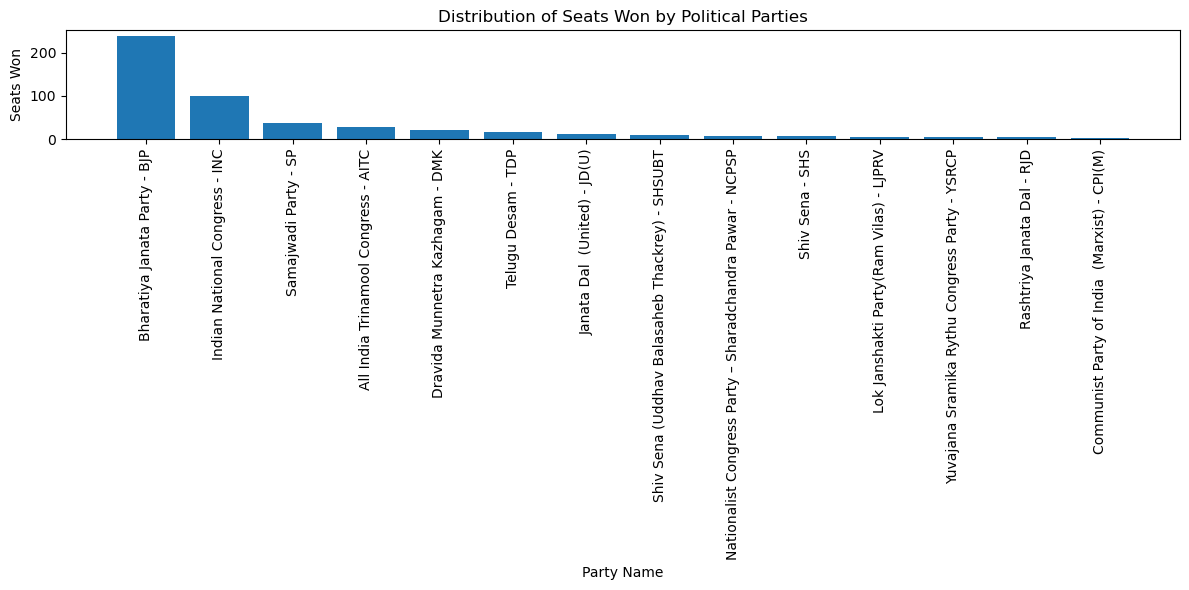

In [83]:
#insight 3 distrubtion of seats
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df['Party Name'], df['Seats Won'])
plt.xticks(rotation=90)
plt.xlabel('Party Name')
plt.ylabel('Seats Won')
plt.title('Distribution of Seats Won by Political Parties')
plt.tight_layout()
plt.show()


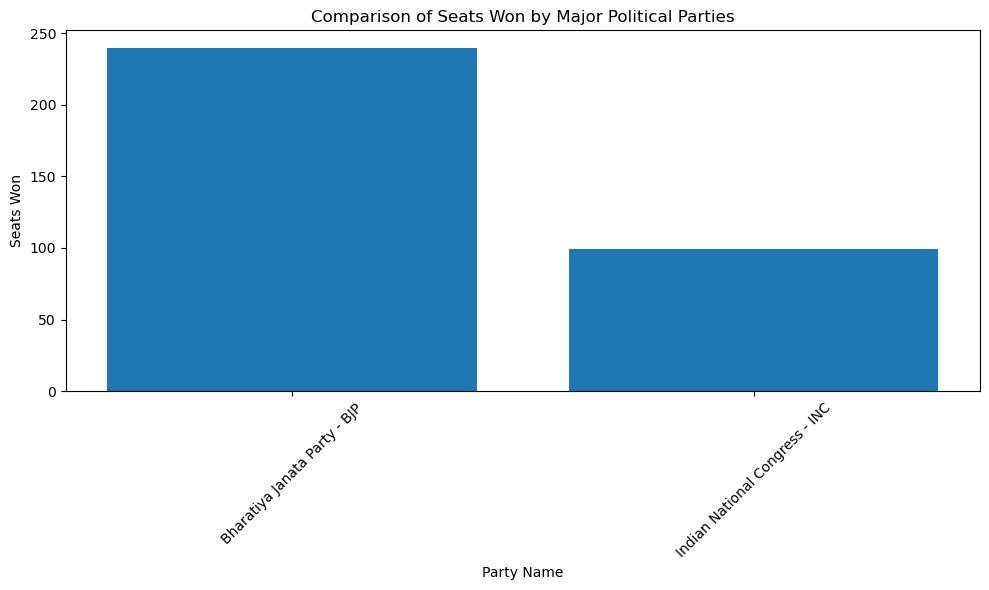

In [84]:
#Insight 4: Comparison of Major Parties
major_parties = df[df['Party Name'].isin(['Bharatiya Janata Party - BJP', 'Indian National Congress - INC' ])]

plt.figure(figsize=(10, 6))
plt.bar(major_parties['Party Name'], major_parties['Seats Won'])
plt.xticks(rotation=45)
plt.xlabel('Party Name')
plt.ylabel('Seats Won')
plt.title('Comparison of Seats Won by Major Political Parties')
plt.tight_layout()
plt.show()



In [86]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [91]:
#insights 5 national vs local parties
df = pd.DataFrame(data, columns=['Party Name', 'Seats Won', 'Some Column', 'Another Column'])

# List of regional party names (just an example)
regional_party_names = ['Samajwadi Party - SP', 'Dravida Munnetra Kazhagam - DMK', 'Telugu Desam - TDP', 'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT']

# Add a 'Region' column based on the list of regional parties
df['Region'] = df['Party Name'].apply(lambda x: 'Regional' if x in regional_party_names else 'National')

# Separate into regional and national parties
regional_parties = df[df['Region'] == 'Regional']
national_parties = df[df['Region'] == 'National']

# Format the tables using tabulate
print("Regional Parties:")
print(tabulate(regional_parties[['Party Name', 'Seats Won']], headers='keys', tablefmt='pretty'))
print("\nNational Parties:")
print(tabulate(national_parties[['Party Name', 'Seats Won']], headers='keys', tablefmt='pretty'))

Regional Parties:
+---+------------------------------------------------+-----------+
|   |                   Party Name                   | Seats Won |
+---+------------------------------------------------+-----------+
| 2 |              Samajwadi Party - SP              |    37     |
| 4 |        Dravida Munnetra Kazhagam - DMK         |    22     |
| 5 |               Telugu Desam - TDP               |    16     |
| 7 | Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT |     9     |
+---+------------------------------------------------+-----------+

National Parties:
+----+----------------------------------------------------------+-----------+
|    |                        Party Name                        | Seats Won |
+----+----------------------------------------------------------+-----------+
| 0  |               Bharatiya Janata Party - BJP               |    240    |
| 1  |              Indian National Congress - INC              |    99     |
| 3  |           All India Trinamool 

In [ ]:
#isights 6 uttarpradesh state  loksabha results
